# Investigate Regression Output
After running EBUS-Extraction to pull out the given upwelling system, I ran the climate-correlation.py script to correlate a near-offshore region of the EBUS with specific climate indices. This saves some CSV files with regression results that will now be interpreted here.

In [1]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Constants

In [2]:
EBUs = ['CalCS', 'HumCS', 'CanCS', 'BenCS']
EBU_Atlantic = ['CanCS', 'BenCS']
EBU_Pacific = ['CalCS', 'HumCS']
colors = {
    'CalCS': '#5ea46d',
    'HumCS': '#9173c8',
    'CanCS': '#b78f3b',
    'BenCS': '#cd5664'
}


ens = ['001', '002', '009', '010', '011',
       '012', '013', '014', '015', '016',
       '017', '018', '019', '020', '021',
       '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031',
       '032', '033', '034', '035', '101',
       '102', '103', '104', '105']

# Functions

In [3]:
def setup_dataframes(EBU, df1, df2, df3, df4):
    fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/' + EBU.lower() + '/region_correlations/'
    df1[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_FG_CO2_vs_smoothed_enso_' + EBU)
    df1[EBU].index = ens
    df2[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_FG_CO2_vs_smoothed_pdo_' + EBU)
    df2[EBU].index = ens
    df3[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_FG_CO2_vs_smoothed_amo_' + EBU)
    df3[EBU].index = ens
    df4[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_FG_CO2_vs_smoothed_sam_' + EBU)
    df4[EBU].index = ens
    return df1, df2, df3, df4

In [4]:
def setup_dataframe(EBU, VAR, df):
    fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/' + EBU.lower() + '/region_correlations/'
    df[EBU] = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_smoothed_' + VAR + '_' + EBU)
    return df

In [5]:
def remove_insignificant(df):
    df = df[df['P-Value'] < 0.05]
    return df

In [6]:
def hist_plot(ax, data, title, EBU):
    # Compute statistics for label.
    mean = np.mean(data.values).round(2)
    std = np.std(data.values).round(2)
    label = EBU + ': ' + str(mean) + ' $\pm$ ' + str(std)
    # Plot
    sns.distplot(data, kde=False, color=colors[EBU], norm_hist=False, bins=8, label=label)
    ax.set_title(title + ' Correlation Distribution', size=25)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('R Value', size=20)
    plt.ylabel('Number of Simulations', size=20)
    plt.ylim([0, 14])
    plt.xlim([-1, 1])
    plt.plot([0, 0], [0, 14], linewidth=1, color='k')

# Climate Indices

In [7]:
# Pull in regression output to dataframes
df_enso, df_pdo, df_amo, df_sam = ({} for i in range(4))
for idx in EBUs:
    df_enso, df_pdo, df_amo, df_sam = setup_dataframes(idx, df_enso, df_pdo, df_amo, df_sam)

In [8]:
# Remove anything with p > 0.05
for ii in EBUs:
    df_enso[ii] = remove_insignificant(df_enso[ii])
    df_pdo[ii] = remove_insignificant(df_pdo[ii])
    df_amo[ii] = remove_insignificant(df_amo[ii])
    df_sam[ii] = remove_insignificant(df_sam[ii])

# Other Variables

In [10]:
VAR = 'pCO2SURF'
df_var = {}
for idx in EBUs:
    df_var = setup_dataframe(idx, VAR, df_var)
    df_var[idx] = remove_insignificant(df_var[idx])

/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


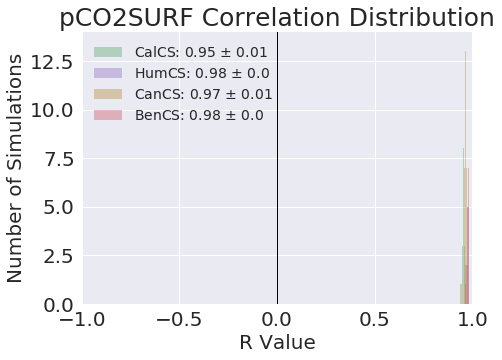

In [11]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
for idx in EBUs:
    hist_plot(ax1, df_var[idx]['R Value'], VAR, idx)
plt.legend(loc='best', handlelength=2, fontsize=14)    
#plt.savefig(VAR + '-correlation-distributions.png')

# Playing with Lagged Correlations

In [ ]:
# 4-MONTH LAGGED HUMCS ENSO
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/humcs/'
df_enso_4 = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_HumCS_lag4')
df_enso_4 = remove_insignificant(df_enso_4)

# 5-MONTH LAGGED HUMCS ENSO
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/humcs/'
df_enso_5 = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_HumCS_lag5')
df_enso_5 = remove_insignificant(df_enso_5)

# 6-MONTH LAGGED HUMCS ENSO
fileDir = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/processed/humcs/'
df_enso_6 = pd.DataFrame.from_csv(fileDir + 'smoothed_fgco2_vs_enso_HumCS_lag6')
df_enso_6 = remove_insignificant(df_enso_6)


sns.set_style('darkgrid')
fig = plt.figure(figsize=(6,6))
ax2 = fig.add_subplot(111)
hist_plot(ax2, df_enso_5['R Value'], 'Nino3.4', 'HumCS', 'HumCS')
plt.title('HumCS Nino3.4 Correlation Distribution' + '\n' + 'ENSO 5-Month Lead', size=20)
plt.savefig('humcs-smoothedFGCO2-enso-lag5-histograms.png')

# Pacific vs. Atlantic R Scores


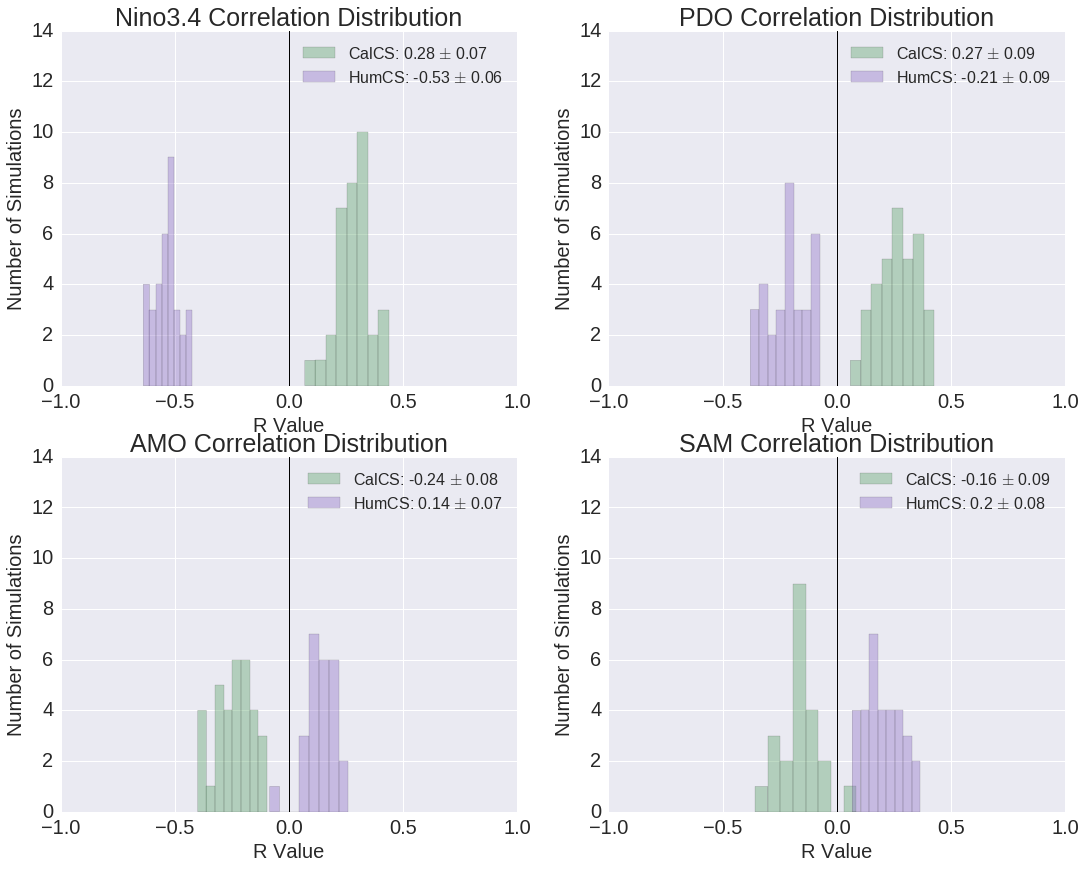

In [37]:
# PACIFIC SECTOR
sns.set_style('darkgrid')
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(221)
for idx in EBU_Pacific:
    hist_plot(ax1, df_enso[idx]['R Value'], 'Nino3.4', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax2 = fig.add_subplot(222)
for idx in EBU_Pacific:
    hist_plot(ax2, df_pdo[idx]['R Value'], 'PDO', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax3 = fig.add_subplot(223)
for idx in EBU_Pacific:
    hist_plot(ax3, df_amo[idx]['R Value'], 'AMO', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax4 = fig.add_subplot(224)
for idx in EBU_Pacific:
    hist_plot(ax4, df_sam[idx]['R Value'], 'SAM', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
    
#plt.savefig("pacific-EBU-correlation-distributions-bothSmoothed.png")
plt.savefig('pacific-EBU-correlation-distributions-bothSmoothed.eps', transparent=False, format='eps', 
            bbox_inches='tight', pad_inches=1, dpi=1000)

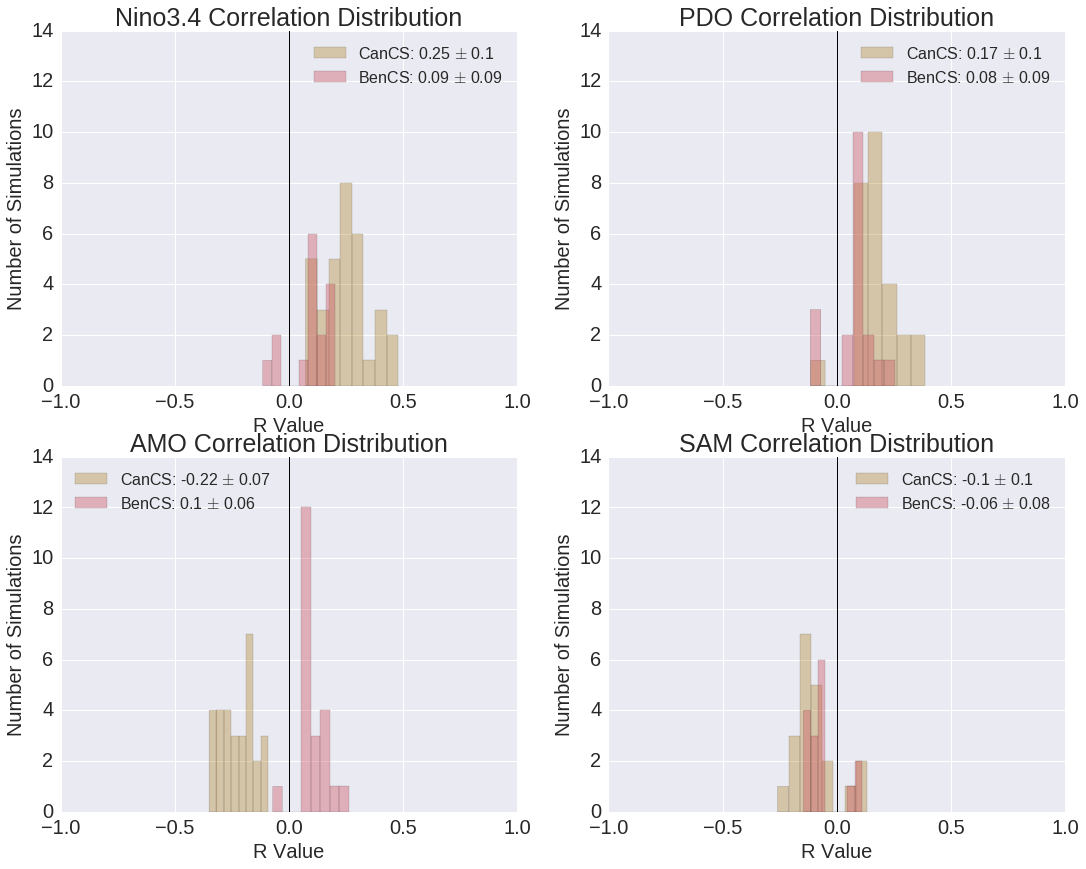

In [38]:
# ATLANTIC SECTOR
sns.set_style('darkgrid')
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(221)
for idx in EBU_Atlantic:
    hist_plot(ax1, df_enso[idx]['R Value'], 'Nino3.4', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax2 = fig.add_subplot(222)
for idx in EBU_Atlantic:
    hist_plot(ax2, df_pdo[idx]['R Value'], 'PDO', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax3 = fig.add_subplot(223)
for idx in EBU_Atlantic:
    hist_plot(ax3, df_amo[idx]['R Value'], 'AMO', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
ax4 = fig.add_subplot(224)
for idx in EBU_Atlantic:
    hist_plot(ax4, df_sam[idx]['R Value'], 'SAM', idx)
    plt.legend(loc='best', handlelength=2, fontsize=16)
    
#plt.savefig("atlantic-EBU-correlation-distributions-bothSmoothed.png")
plt.savefig('atlantic-EBU-correlation-distributions-bothSmoothed.eps', transparent=False, format='eps', 
            bbox_inches='tight', pad_inches=1, dpi=1000)

# Outputting to LaTeX

In [ ]:
df = df_amo.copy()
BASIN = 'Atlantic'

###
if BASIN.lower() == 'pacific':
    df['CalCS'] = df['CalCS'].where(df['CalCS']['P-Value'] < 0.05)
    df['HumCS'] = df['HumCS'].where(df['HumCS']['P-Value'] < 0.05)
    #df['CalCS'] = df['CalCS'].fillna(value='-')
    #df['HumCS'] = df['HumCS'].fillna(value='-')
    df['CalCS'] = df['CalCS'].drop('P-Value', axis=1)
    df['HumCS'] = df['HumCS'].drop('P-Value', axis=1)
    df.pop('CanCS', None)
    df.pop('BenCS', None)
    frames = [df['CalCS'], df['HumCS']]
elif BASIN.lower() == 'atlantic':
    df['CanCS'] = df['CanCS'].where(df['CanCS']['P-Value'] < 0.05)
    df['BenCS'] = df['BenCS'].where(df['BenCS']['P-Value'] < 0.05)
    #df['CanCS'] = df['CanCS'].fillna(value='-')
    #df['BenCS'] = df['BenCS'].fillna(value='-')
    df['CanCS'] = df['CanCS'].drop('P-Value', axis=1)
    df['BenCS'] = df['BenCS'].drop('P-Value', axis=1)
    df.pop('CalCS', None)
    df.pop('HumCS', None)
    frames = [df['CanCS'], df['BenCS']]
result = pd.concat(frames, axis=1)
print result.round(2).to_latex()

In [ ]:
EBUS = "BenCS"
print "mean slope: " + str(np.nanmean(df[EBUS]['Slope'].values).round(2))
print "mean r: " + str(np.nanmean(df[EBUS]['R Value'].values).round(2))
print "mean r2: " + str(np.nanmean(df[EBUS]['R Squared'].values).round(2))
print "----------"
print "std slope: " + str(np.nanstd(df[EBUS]['Slope'].values).round(2))
print "std r: " + str(np.nanstd(df[EBUS]['R Value'].values).round(2))
print "std r2: " + str(np.nanstd(df[EBUS]['R Squared'].values).round(2))